In [481]:
from PIL import Image
import cv2 as cv
# Image.open('./threat_images/BAGGAGE_20170522_113049_80428_A.jpg')
import timeit
import numpy as np

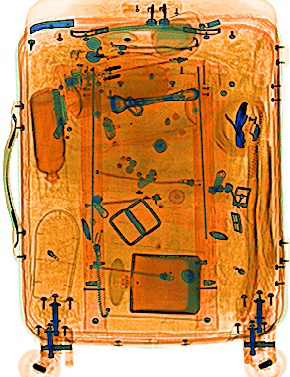

In [19]:
im1=Image.open('./background_images/BAGGAGE_20180811_175323_83216_B_1.jpg')
im1

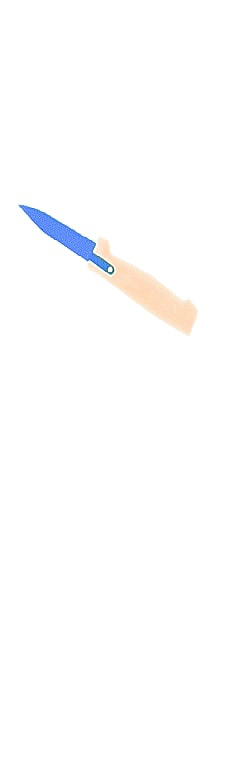

In [20]:
im2=Image.open('./threat_images/BAGGAGE_20170522_113049_80428_A.jpg')
im2

In [14]:
im3=im2.paste(im1)

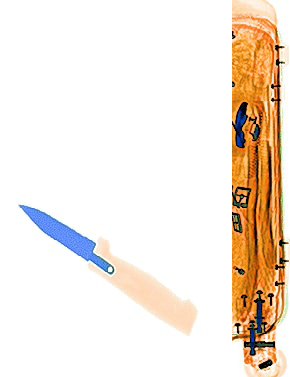

In [18]:
im1

In [23]:
from matplotlib import pyplot as plt

In [472]:
im2=cv.imread('./threat_images/BAGGAGE_20170522_113049_80428_A.jpg')
# ax=plt.axes(xticks=[],yticks=[])


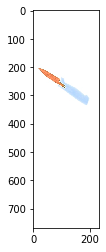

In [34]:
plt.imshow(im1)
plt.imshow(im2)

In [69]:
import os
l=os.listdir('.')
l

['.ipynb_checkpoints',
 'background_images',
 'BaggageAI_CV_Hiring_assignment.pdf',
 'sample_output_images',
 'threat_images',
 'Untitled.ipynb']

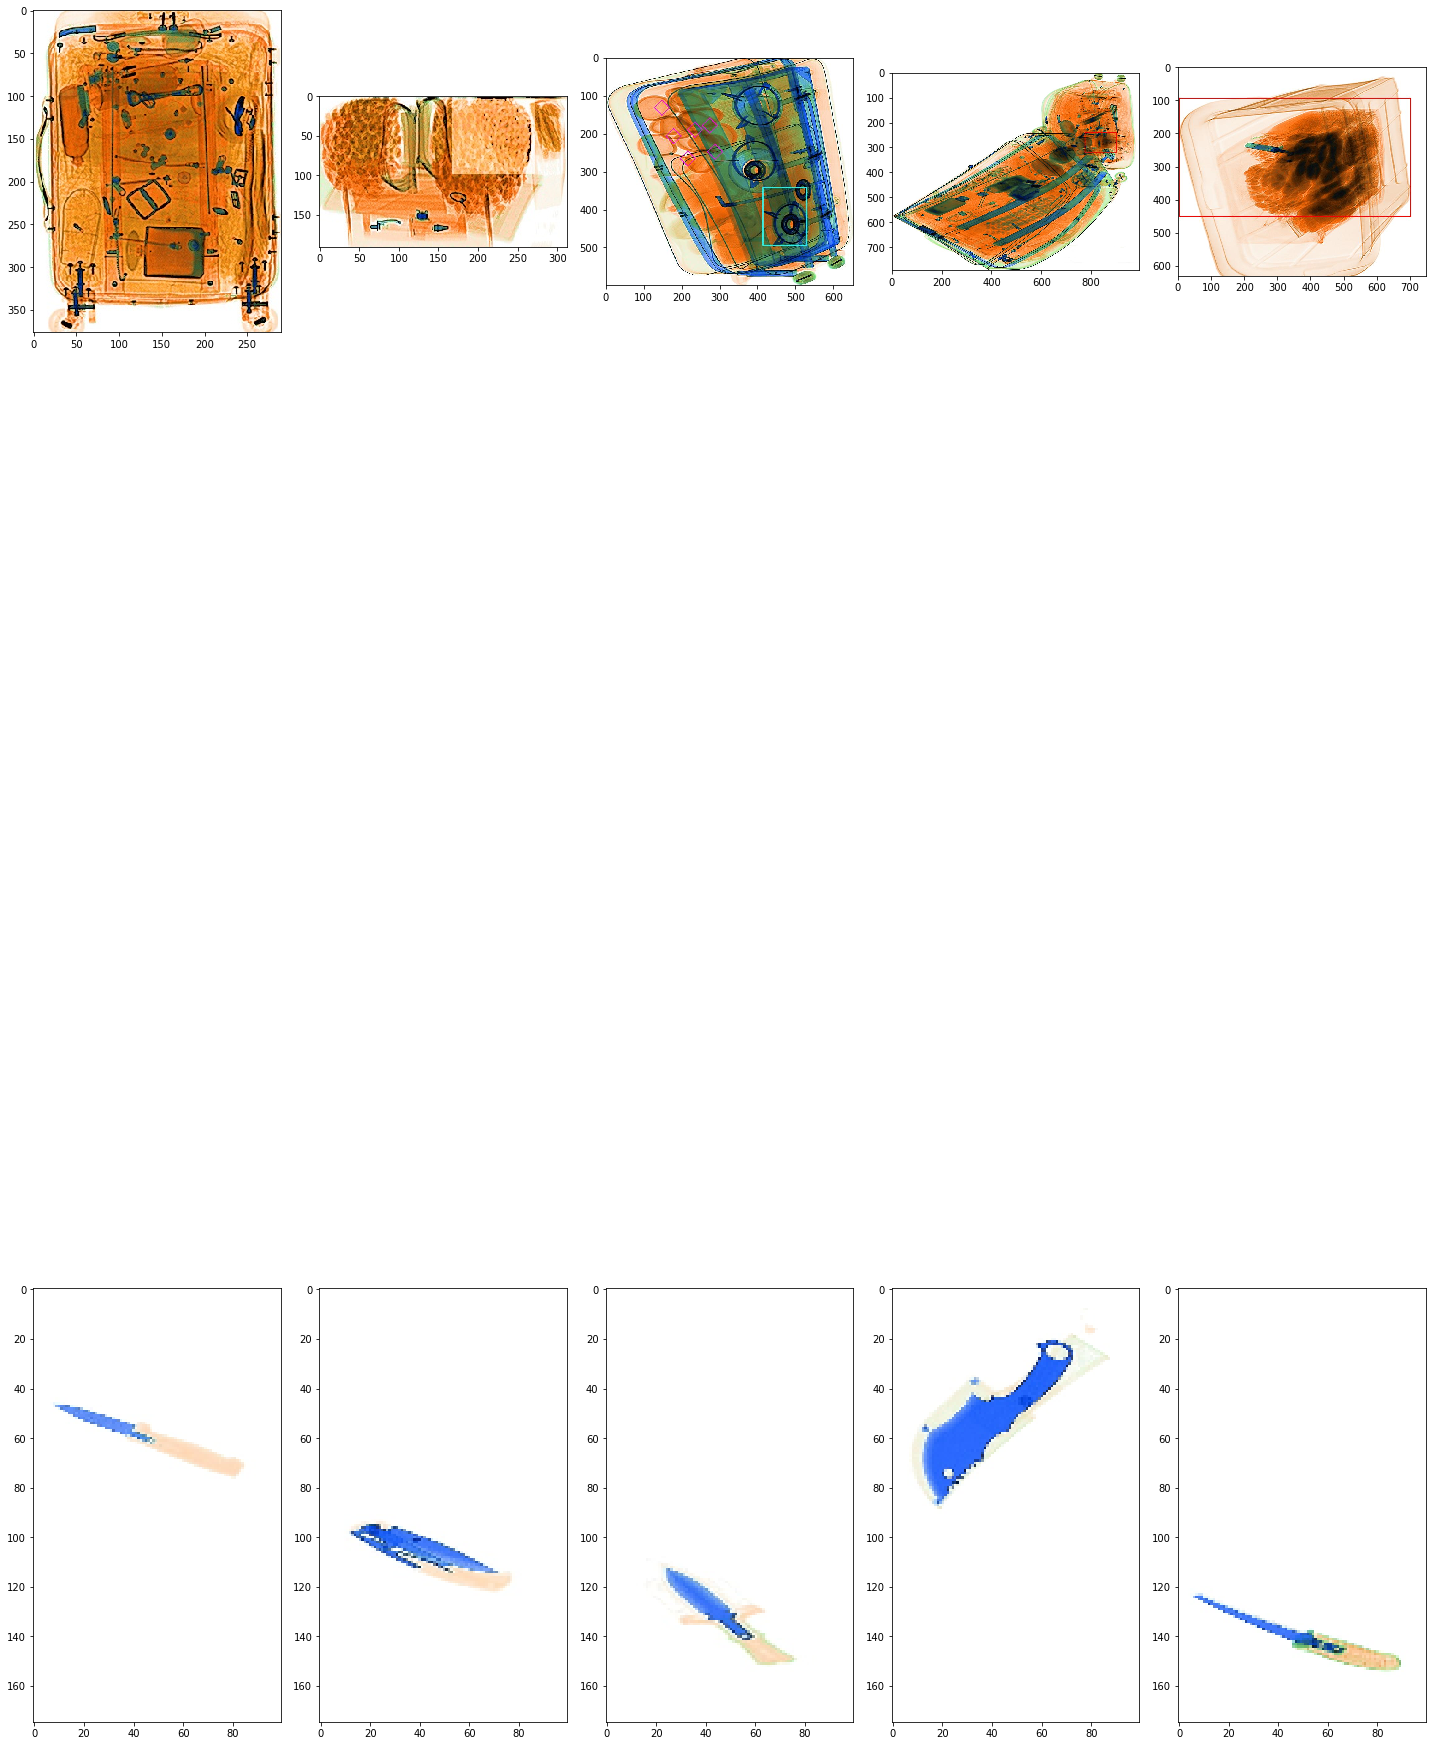

In [450]:
l=os.listdir('.')
fig,axs=plt.subplots(2,5,figsize=(20,50))
p=-1
for i in range(len(l)):
    if i in[1,4]:
        p+=1
        path='.'
        file=l[i]
        
        li=os.listdir('.'+'/'+file)
        q=-1
        for j in li:
            path1=path+'/'+file+'/'+j
#             print(path1)
            img=cv.imread(path1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            q+=1
#             if p==0:
#                 img=cv.resize(img,(700,700))
            if p==1:
                img=cv.resize(img,(100,175))
            axs[p,q].imshow(img)
# plt.show()
plt.tight_layout()

In [585]:
def cvtcolor(img):
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    return img
def resize(img):
    return cv.resize(img,(100,200))
def gray(img):
    return cv.cvtColor(img,cv.COLOR_RGB2GRAY)

In [371]:
im1=cv.imread('./threat_images/BAGGAGE_20170522_113049_80428_A.jpg')
im2=cv.imread('./background_images/BAGGAGE_20180811_175323_83216_B_1.jpg')
im1=cvtcolor(im1)
im2=cvtcolor(im2)
# im1=cvtcolor(im1)
# im2=cvtcolor(im2)
# plt.imshow(im2)

In [372]:
im1=resize(im1)
# plt.imshow(im1)

In [545]:
def plot(img,ap=None):
    plt.imshow(img,cmap=ap)

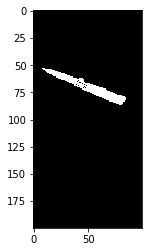

In [420]:
roi=im2[0:row,20:col+20]
# plt.imshow(roi)
im1_gr=gray(im1)
# plt.imshow(im1_gr,cmap='gray')
ret, mask = cv.threshold(im1_gr, 240, 255, cv.THRESH_BINARY)
# cv.threshold(im1_gr, 10, 255, cv.THRESH_BINARY)
# plt.imshow(mask,cmap='gray')
mask_inv = cv.bitwise_not(mask)
plt.imshow(mask_inv,cmap='gray')

104 ms ± 7.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


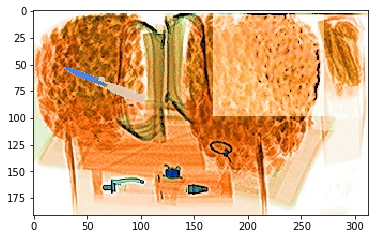

In [568]:
%%timeit
im1=cv.imread('./threat_images/BAGGAGE_20170522_113049_80428_A.jpg')
im2=cv.imread('./background_images/BAGGAGE_20180811_175328_83216_A_1.jpg')
im1=cvtcolor(im1)
im2=cvtcolor(im2)
im1=resize(im1)
row,col,ch=im1.shape
roi=im2[0:row,20:col+20]
# plt.imshow(roi)
im1_gr=cv.cvtColor(im1,cv.COLOR_RGB2GRAY)
# plt.imshow(im1_gr,cmap='gray')
ret, mask = cv.threshold(im1_gr, 240, 255, cv.THRESH_BINARY)
# cv.threshold(im1_gr, 10, 255, cv.THRESH_BINARY)
# plt.imshow(mask,cmap='gray')
mask_inv = cv.bitwise_not(mask)
# plt.imshow(mask_inv,cmap='gray')
for i in range(len(mask)):
    for j in range(len(mask[0])):
        if mask[i][j]<255:
            roi[i][j]=0.9*(im1[i][j])
# plot(roi)
im2[:row,20:col+20]=roi
plot(im2)
im3=im2
plot(im3)

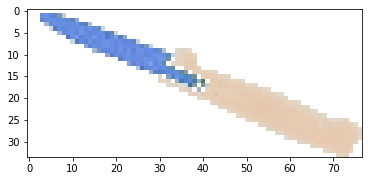

In [661]:
# %%timeit
im1=cv.imread('./threat_images/BAGGAGE_20170522_113049_80428_A.jpg')
im2=cv.imread('./background_images/BAGGAGE_20180811_175328_83216_A_1.jpg')
im1=cvtcolor(im1)
im2=cvtcolor(im2)
im1=resize(im1)
# row,col,ch=im1.shape



gray = cv.cvtColor(im1, cv.COLOR_RGB2GRAY)
# plt.imshow(gray,cmap='gray')
_, threshed = cv.threshold(gray, 240, 255, cv.THRESH_BINARY_INV)
# plot(threshed,'gray')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11, 11))
# plot(kernel,'gray')
morphed = cv.morphologyEx(threshed, cv.MORPH_CLOSE, kernel)
# plot(morphed,'gray')
cnts = cv.findContours(morphed, 
                        cv.RETR_EXTERNAL,
                        cv.CHAIN_APPROX_SIMPLE)[0]

cnt = sorted(cnts, key=cv.contourArea)[-1]

mask = cv.drawContours(threshed, cnt, 0, (0, 0, 0), 5)
masked_data = cv.bitwise_and(im1, im1, mask=mask)

x, y, w, h = cv.boundingRect(cnt)
dst = masked_data[y: y + h, x: x + w]

dst_gray = cv.cvtColor(dst, cv.COLOR_RGB2GRAY)
_, alpha = cv.threshold(dst_gray, 0, 255, cv.THRESH_BINARY)
b, g, r = cv.split(dst)

rgba = [b, g, r, alpha]
dst = cv.merge(rgba, 4)
dst=np.multiply(dst,0.9)
def add_img(image,background):
    image_shape = image.shape
    image_height = image_shape[0]
    image_width = image_shape[1]
    
#     backgound = create_blank_image(image_height, 
#                                    image_width,
#                                    rgb_color=(0, 0, 255))
    
    background = Image.fromarray(background)
    image = Image.fromarray(image)
    
    background.paste(image,
                     (25, 25),
                     image)
    return background
bg=add_img(dst.astype('uint8'),im2)
plot(dst.astype('uint8'))
# 
# plot(dst.astype('uint8'))

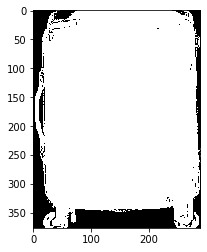

In [602]:
im2=cv.imread('./background_images/BAGGAGE_20180811_175323_83216_B_1.jpg')
im2=cvtcolor(im2)
# plot(im2)
im2_gr=gray(im2)
_, threshed = cv.threshold(im2_gr, 240, 255, cv.THRESH_BINARY_INV)
# plot(threshed,'gray')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11, 11))
# plot(kernel,'gray')
morphed = cv.morphologyEx(threshed, cv.MORPH_CLOSE, kernel)
# plot(morphed,'gray')
cnts = cv.findContours(morphed, 
                        cv.RETR_EXTERNAL,
                        cv.CHAIN_APPROX_SIMPLE)[0]

cnt = sorted(cnts, key=cv.contourArea)[-1]

mask = cv.drawContours(threshed, cnt, 0, (0, 0, 0), 5)
plot(mask,'gray')
# cnt

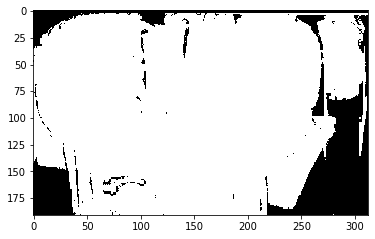

In [604]:
bg_gr=gray(bg)
_, threshed = cv.threshold(bg_gr, 240, 255, cv.THRESH_BINARY_INV)
# plot(threshed,'gray')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11, 11))
# plot(kernel,'gray')
morphed = cv.morphologyEx(threshed, cv.MORPH_CLOSE, kernel)
# plot(morphed,'gray')
cnts = cv.findContours(morphed, 
                        cv.RETR_EXTERNAL,
                        cv.CHAIN_APPROX_SIMPLE)[0]

cnt = sorted(cnts, key=cv.contourArea)[-1]

musk = cv.drawContours(threshed, cnt, 0, (0, 0, 0), 5)
plot(mask,'gray')
# cnt

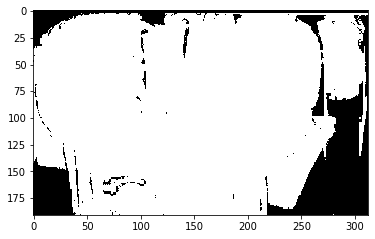

In [605]:
im2=cv.imread('./background_images/BAGGAGE_20180811_175328_83216_A_1.jpg')
# im1=cvtcolor(im1)
im2=cvtcolor(im2)
im2_gr=gray(im2)
_, threshed = cv.threshold(im2_gr, 240, 255, cv.THRESH_BINARY_INV)
# plot(threshed,'gray')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11, 11))
# plot(kernel,'gray')
morphed = cv.morphologyEx(threshed, cv.MORPH_CLOSE, kernel)
# plot(morphed,'gray')
cnts = cv.findContours(morphed, 
                        cv.RETR_EXTERNAL,
                        cv.CHAIN_APPROX_SIMPLE)[0]

cnt = sorted(cnts, key=cv.contourArea)[-1]

mask = cv.drawContours(threshed, cnt, 0, (0, 0, 0), 5)
plot(mask,'gray')

In [613]:
arr=cv.absdiff(musk,mask)
num_of_non_zeros = np.count_nonzero(arr)
if num_of_non_zeros == 0:
    print(True)

True


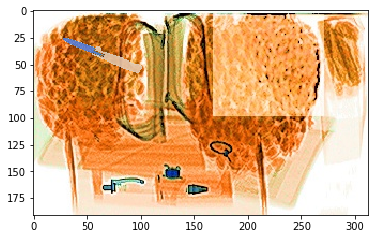

In [600]:
bg=np.array(bg)
plot(bg)

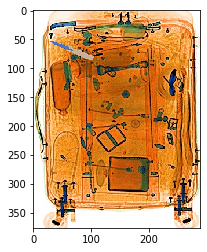

In [370]:
im2[:row,20:col+20]=roi
plot(im2)

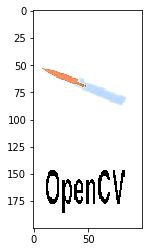

In [257]:
img_bg=cv.bitwise_and(roi,roi,mask=mask_inv)
img_fg=cv.bitwise_and(im1,im1,mask=mask)
i=cv.add(img_bg,img_fg,mask=mask)
plot(i)

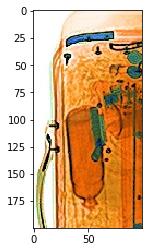

In [241]:
roi=cvtcolor(roi)
plot(roi)

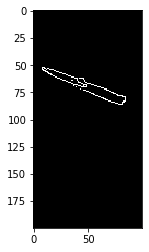

In [267]:
edges=cv.Canny(im1_gr,15,50)
plt.imshow(edges,cmap='gray')

In [268]:
cv.findContours(edges,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)[1]

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [-1,  6, -1, -1]]], dtype=int32)

In [307]:
# plot(mask_inv)m2, contours, hierarchy = 
l=cv.findContours(mask_inv, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [308]:
l[0][0]

array([[[ 8, 53]],

       [[ 9, 54]],

       [[10, 54]],

       [[13, 57]],

       [[14, 57]],

       [[15, 58]],

       [[16, 58]],

       [[18, 60]],

       [[20, 60]],

       [[21, 61]],

       [[22, 61]],

       [[23, 62]],

       [[25, 62]],

       [[26, 63]],

       [[28, 63]],

       [[29, 64]],

       [[30, 64]],

       [[31, 65]],

       [[32, 65]],

       [[33, 66]],

       [[35, 66]],

       [[36, 67]],

       [[37, 67]],

       [[38, 68]],

       [[38, 69]],

       [[39, 70]],

       [[41, 70]],

       [[42, 71]],

       [[44, 71]],

       [[45, 72]],

       [[46, 72]],

       [[47, 73]],

       [[48, 73]],

       [[49, 74]],

       [[50, 74]],

       [[51, 75]],

       [[52, 75]],

       [[53, 76]],

       [[54, 76]],

       [[55, 77]],

       [[57, 77]],

       [[58, 78]],

       [[59, 78]],

       [[60, 79]],

       [[61, 79]],

       [[62, 80]],

       [[63, 80]],

       [[64, 81]],

       [[66, 81]],

       [[67, 82]],



In [309]:
c=cv.drawContours(im1, l[0], -1, (255,255,255), 1)

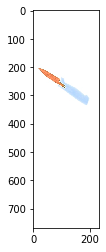

In [310]:
plot(c)

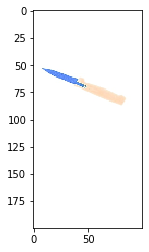

In [445]:
plot(im1)

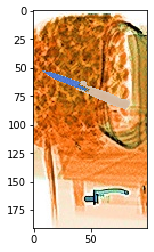

In [440]:
plot(roi)

In [441]:
roi[64][46]

array([212, 191, 170], dtype=uint8)

In [444]:
print(im1[75][50:75])

[[255 253 250]
 [252 244 233]
 [247 230 209]
 [249 225 198]
 [255 223 195]
 [253 220 188]
 [253 216 185]
 [254 214 185]
 [253 216 185]
 [252 217 184]
 [252 217 183]
 [252 215 181]
 [254 215 181]
 [254 215 183]
 [253 216 187]
 [254 217 190]
 [254 218 192]
 [254 220 194]
 [254 222 196]
 [251 223 195]
 [251 226 200]
 [249 229 206]
 [249 235 217]
 [253 247 235]
 [255 255 252]]


In [434]:
im2[55][25]

array([  0,  84, 195], dtype=uint8)

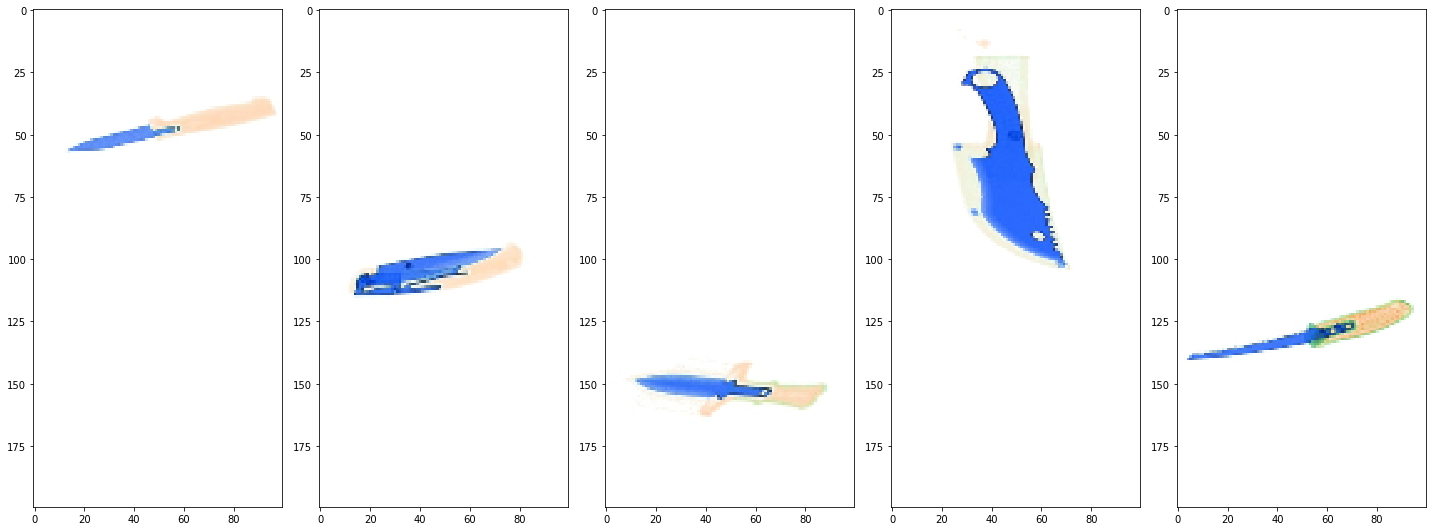

In [659]:
l=os.listdir('.')
fig,axs=plt.subplots(1,5,figsize=(20,50))
p=-1
for i in range(len(l)):
    if i in[6]:
        p+=1
        path='.'
        file=l[i]
        
        li=os.listdir('.'+'/'+file)
        q=-1
        for j in range(len(li)):
            path1=path+'/'+file+'/'+li[j]
#             print(path1)
            center_list=[(50,200),(50,450),(150,600),(150,220),(10,570)]
            img=cv.imread(path1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            q+=1
            img=cv.resize(img,(300,800))
            h,w,ch=img.shape
            
            M=cv.getRotationMatrix2D(center_list[j],45,1.0)
            rot=cv.warpAffine(img,M,(w,h),borderValue=(255,255,255))
#             if p==0:
#                 img=cv.resize(img,(700,700))
#             if p==1:
            
#             rot=resize(rot)
            rot=resize(rot)
            axs[q].imshow(rot)
# plt.show()
plt.tight_layout()

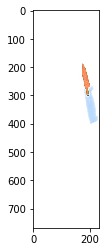

In [492]:
plot(im1)
h,w,ch=im2.shape
M=cv.getRotationMatrix2D((w//2,h//2),-45,1.0)
rot=cv.warpAffine(im2,M,(w,h),borderValue=(255,255,255))
plot(rot)

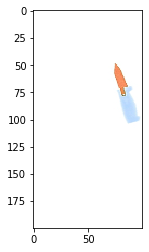

In [493]:
rot=resize(rot)
plot(rot)

In [494]:
rot[100][10]

array([255, 255, 255], dtype=uint8)

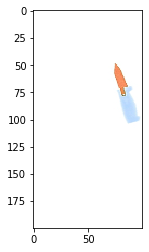

In [495]:
rot[np.where((rot == [
    
    
    1,1,1]).all(axis = 2))] = [255,255,255]
plot(rot)

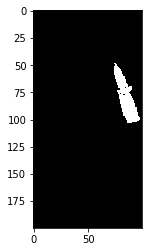

In [496]:
rot_gr=gray(rot)
# plt.imshow(im1_gr,cmap='gray')
ret, mask_rot = cv.threshold(rot_gr, 240, 255, cv.THRESH_BINARY)
# cv.threshold(im1_gr, 10, 255, cv.THRESH_BINARY)
# plt.imshow(mask,cmap='gray')
mask_inv_rot = cv.bitwise_not(mask_rot)
plt.imshow(mask_inv_rot,cmap='gray')

In [658]:
l

['.ipynb_checkpoints',
 'background_images',
 'BaggageAI_CV_Hiring_assignment.pdf',
 'image_processing.py',
 'main.py',
 'sample_output_images',
 'threat_images',
 'Untitled.ipynb',
 '__pycache__']